# Movie Genre Classification

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("/content/movie_genre_dataset.csv")
df.head()

,title,genre
0,Shadow Strike,Action
1,Iron Vengeance,Action
2,Rogue Mission,Action
3,Desert Ambush,Action
4,Final Pursuit,Action


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   100 non-null    object
 1   genre   100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [37]:
df.shape

(100, 2)

In [38]:
df.genre.value_counts()

,count
genre,
Action,15
Comedy,15
Drama,15
Horror,15
Sci-Fi,15
Romance,10
Thriller,10
Animation,5


In [62]:
genre_mapping = {
    'Action' : 0,
    'Comedy' : 1,
    'Drama' : 2,
    'Horror' : 3,
    'Sci-Fi' : 4,
    'Romance' : 5,
    'Thriller' : 6,
    'Animation' : 7
}
df['genre'] = df['genre'].replace(genre_mapping)
df.head()

,title,genre,title_length
0,shadow strike,4,13
1,iron vengeance,4,14
2,rogue mission,4,13
3,desert ambush,4,13
4,final pursuit,4,13


# Data Cleaning

In [41]:
df.isnull().sum()

,0
title,0
genre,0


In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.shape

(100, 2)

# Data Preprocessing

In [44]:
import re

def preprocess(text):
  if text is not None:

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
  else:
    text = ''
  return text

In [46]:
df['title'] = df['title'].apply(preprocess)
df.head()

,title,genre
0,shadow strike,4
1,iron vengeance,4
2,rogue mission,4
3,desert ambush,4
4,final pursuit,4


# Exploratory Data Analysis


In [47]:
genre_counts = df['genre'].value_counts()
print(genre_counts)

genre
3         20
Comedy    15
4         15
6         15
2         15
5         10
1         10
Name: count, dtype: int64


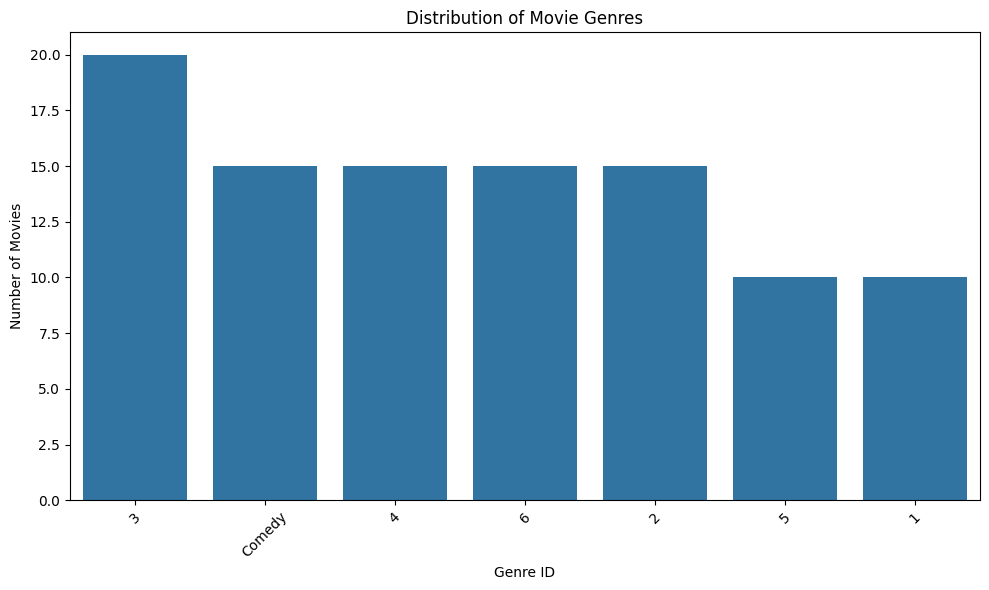

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre ID')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
df['title_length'] = df['title'].str.len()
df.head()

,title,genre,title_length
0,shadow strike,4,13
1,iron vengeance,4,14
2,rogue mission,4,13
3,desert ambush,4,13
4,final pursuit,4,13


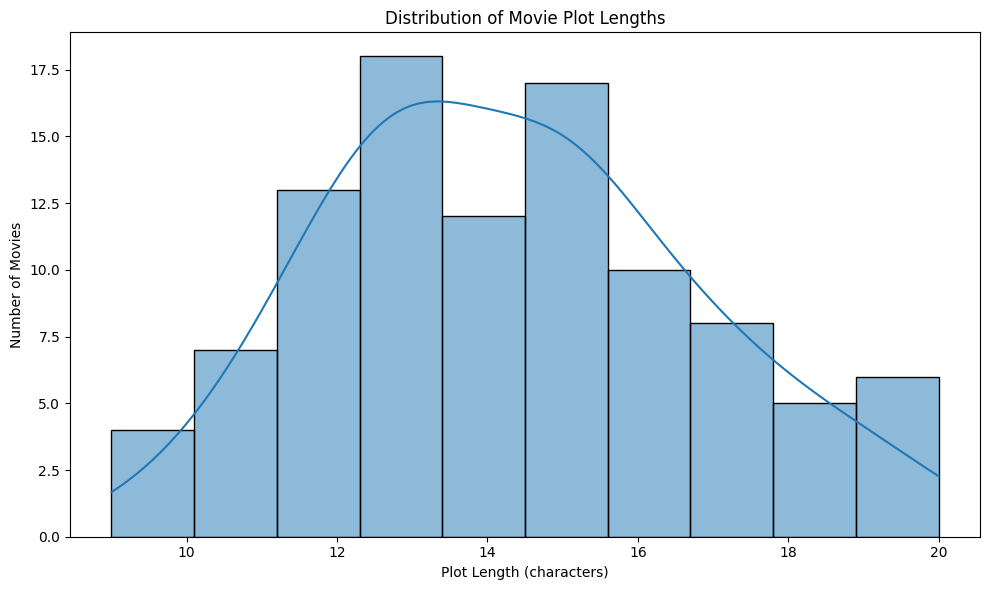

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], bins=10, kde=True)
plt.title('Distribution of Movie Plot Lengths')
plt.xlabel('Plot Length (characters)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

# Splitting the data

In [64]:
x = df['title']
y = df['genre']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:

vector = TfidfVectorizer(ngram_range=(1, 2))
x_train_tfidf = vector.fit_transform(x_train)
x_test_tfidf = vector.transform(x_test)

In [66]:
print(x_test_tfidf[0].toarray().shape)

(1, 253)


In [67]:
models = {
    "SVC" : SVC(),
    "BernoulliNB" : BernoulliNB(),
    "LogisticRegression" : LogisticRegression()
}

# Training the Models

In [68]:
for model_name, model in models.items():
  model.fit(x_train_tfidf, y_train)
  y_pred = model.predict(x_test_tfidf)

  accuracy = accuracy_score(y_test, y_pred)

  print("Model Name : ", model_name)
  print()

  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print()

  print(f"Model Accuracy: {accuracy*100:.2f}")

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  print()

Model Name :  SVC

Confusion Matrix:
[[2 0 1 0 0 0]
 [2 0 0 0 0 0]
 [2 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 1 0 0 0]]

Model Accuracy: 10.00

Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.67      0.19         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         5

    accuracy                           0.10        20
   macro avg       0.02      0.11      0.03        20
weighted avg       0.02      0.10      0.03        20


Model Name :  BernoulliNB

Confusion Matrix:
[[3 0 0 0 0 0]
 [2 0 0 0 0 0]
 [2 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [5 0 0 0 0 0]]

Model Accuracy: 15.00

Classification Report:
              precision    recall  f1-score   support

           1       0.15      1.00      0.26